Provided by DeepCast
<br>
Written by Annie Evans aevans@deepcast.ai Jan 2018

In [1]:
from IPython.display import Image 

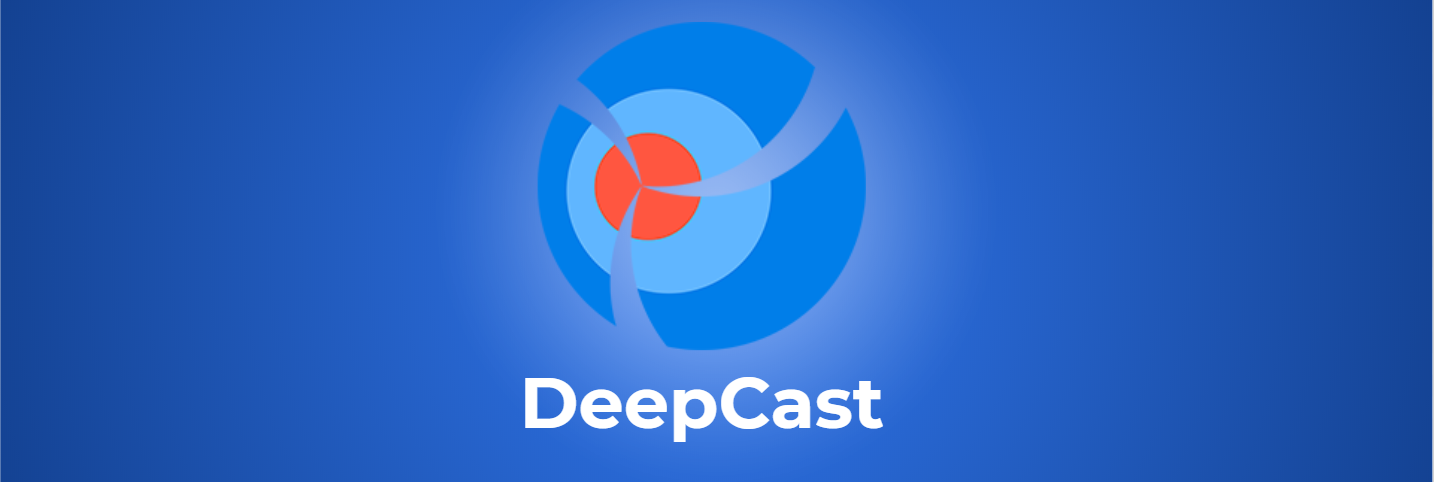

In [2]:
Image('../img/DeepCast_logo.png')

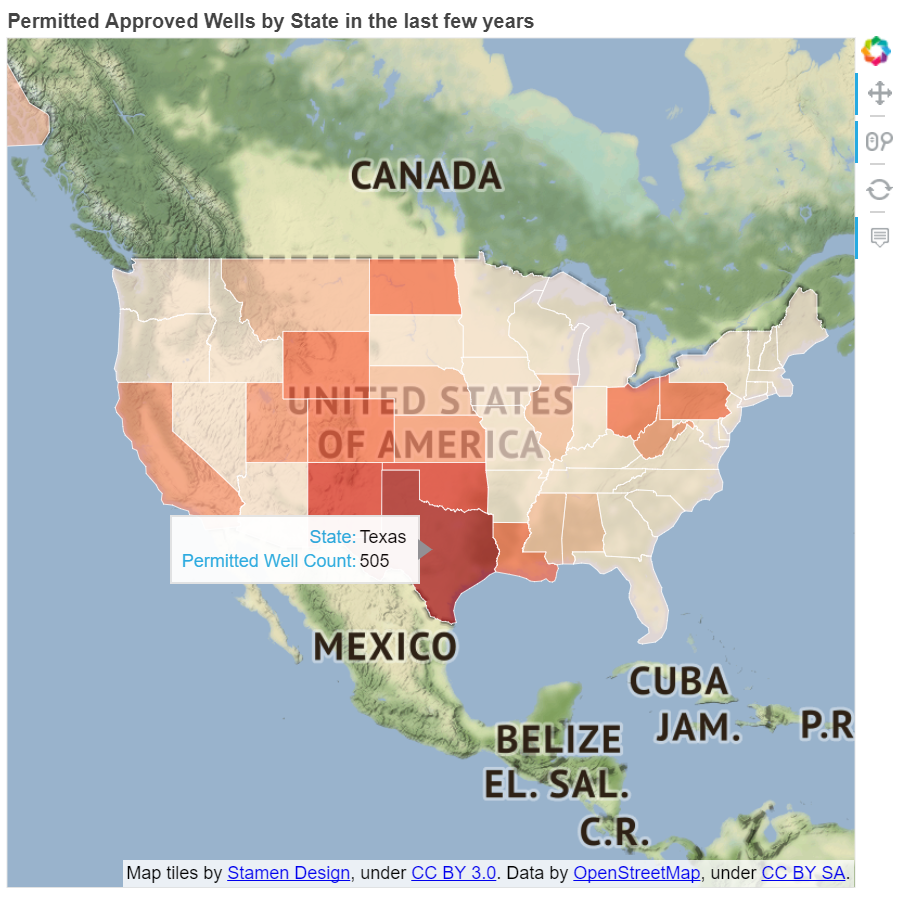

In [3]:
Image('../img/well_map.png')

# New to Bokeh? If you already an Anaconda user, simply execute the this code in your Terminal (Mac) or Anaconda Command Prompt (Windows)


```
> conda install bokeh
```

https://bokeh.pydata.org/en/latest/

https://www.anaconda.com/download/

# Import Required Libraries

In [4]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.palettes import Reds6 as palette
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER, STAMEN_TERRAIN_RETINA
from bokeh.models import (ColumnDataSource, Circle, Range1d, PanTool,WheelZoomTool, BoxSelectTool, HoverTool, LinearColorMapper, LogColorMapper)
palette.reverse()

# Read in JSON file of State shapes and Approved Permitted Well Counts

In [5]:
df = pd.read_json('../data/wells.json')

# Mapping Function

In [6]:
def map_wells(df):
    '''Takes in a Pandas DataFrame with the columns and creates a file state_map.html of 
    the Approved Permitted Well Count by State.
    INPUT: 
    df as Pandas DataFrame with columns:
        STATE_X as List of floats representing the Web Mercator coordinates for the State Shapes (Converted from Lon)
        STATE_Y as List of floats representing the Web Mercator coordinates for the State Shapes (Converted from Lat)
        COUNT as integers 
    OUPUT: NONE
    
    '''
    #Set up the color theme
    color_mapper = LogColorMapper(palette=palette)
    
    #Set up which Bokeh Tools to use
    TOOLS = "pan,wheel_zoom,reset,hover"

    #Create an instance of the class figure() and assign to the variable fig
    fig = figure(title="Permitted Approved Wells by State in the last few years", tools=TOOLS,x_axis_location=None, y_axis_location=None)
    
    #Turn off the grid lines
    fig.grid.grid_line_color = None
    
    #Create an instance of the class ColumnDataSource() and assign to the variable source which we will
    #use when creating the state shapes
    source = ColumnDataSource(df)
    
    #Use the add_tile method to add a pretty map background
    fig.add_tile(STAMEN_TERRAIN_RETINA)
    
    #Use the patches method to add the state shapes
    fig.patches('STATE_X', 'STATE_Y', source=source,
          fill_color={'field': 'COUNT', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)
    
    #Creat an instance of a Hovertool display the State Name and the Permitted Well Count
    hover = fig.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
                        ("State", "@state_province"),
                        ("Permitted Well Count", "@COUNT"),
]
    #Create the state_map.html file
    output_file("../well_map.html")
    
    #Show the figure
    show(fig)

# Execute map_wells() and pass the argument df to the parameter df

In [7]:
map_wells(df)